In [73]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [74]:
#Importing data of 2014 into notebook
data_df = pd.read_csv('/Users/sarah/Library/Mobile Documents/com~apple~CloudDocs/UCI DATA Analytics /osmi 2/osmi-mental-health-in-tech-survey-2014/survey.csv')
data_df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [75]:
#Viewing the data 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [76]:
#see the missing data row 
data_df.isna().sum().sort_values()
#As a team agreed to remove "coments"

Timestamp                       0
Age                             0
Gender                          0
Country                         0
treatment                       0
family_history                  0
remote_work                     0
no_employees                    0
wellness_program                0
care_options                    0
tech_company                    0
benefits                        0
seek_help                       0
mental_health_consequence       0
leave                           0
anonymity                       0
mental_vs_physical              0
obs_consequence                 0
mental_health_interview         0
phys_health_consequence         0
coworkers                       0
supervisor                      0
phys_health_interview           0
self_employed                  18
work_interfere                264
state                         515
comments                     1095
dtype: int64

In [77]:
#dropping a column "commnets" and "Timestamp"
data_df.drop(columns='comments', inplace=True)
data_df.drop(columns='Timestamp', inplace=True)

In [78]:
#making sure columns are removed 
data_df

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,NC,No,No,No,NaN,100-500,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [79]:
# Unique values in the 2014 Data to begin cleaning with new columns
data_df.nunique()

Age                          53
Gender                       49
Country                      48
state                        45
self_employed                 2
family_history                2
treatment                     2
work_interfere                4
no_employees                  6
remote_work                   2
tech_company                  2
benefits                      3
care_options                  3
wellness_program              3
seek_help                     3
anonymity                     3
leave                         5
mental_health_consequence     3
phys_health_consequence       3
coworkers                     3
supervisor                    3
mental_health_interview       3
phys_health_interview         3
mental_vs_physical            3
obs_consequence               2
dtype: int64

In [80]:
#dropping rows with misisng values
data_df = data_df.dropna() 


In [81]:
# # Removal of possible duplicate rows

data_df.drop_duplicates(inplace=True)
data_df.head()

/var/folders/ld/_9w6z7q574zcq1t64560_nxw0000gn/T/ipykernel_930/2446840176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.drop_duplicates(inplace=True)


,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,male,United States,MD,Yes,Yes,No,Sometimes,1-5,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,29,Male,United States,NY,No,Yes,Yes,Sometimes,100-500,No,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31,male,United States,NC,Yes,No,No,Never,1-5,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46,Male,United States,MA,No,No,Yes,Often,26-100,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
23,41,Male,United States,IA,No,No,Yes,Never,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No


In [82]:
#Focus on Tech Companies 

#Only Tech companies 
data_df = data_df.dropna(subset=['tech_company'])
#determine which are Yes tech and which No tech
tech_comps = data_df['tech_company'].value_counts()
tech_comps
#Data is to only include Yes tech_company


tech_company
Yes    486
No     105
Name: count, dtype: int64

In [83]:
#Removal of non tech company columns 
data_df = data_df[data_df['tech_company'] != 0.0]
data_df.drop(columns = 'tech_company', inplace = True)

In [84]:
#Gender

#View all Gender Options 
data_df['Gender'].value_counts()

Gender
Male                  271
male                   71
M                      68
Female                 66
female                 37
F                      27
m                      13
f                       9
Make                    4
Female                  2
Cis Male                2
Female (trans)          2
Cis Female              1
Trans-female            1
Male-ish                1
woman                   1
non-binary              1
queer/she/they          1
Nah                     1
cis-female/femme        1
Male                    1
Trans woman             1
Genderqueer             1
msle                    1
Female (cis)            1
Mail                    1
cis male                1
A little about you      1
p                       1
Woman                   1
femail                  1
Name: count, dtype: int64

In [85]:
#Gender Reduction 
#Three gender options agreed for data 
#Note to self Old:New 
gender_options = {
    'male': 'Male', 'M': 'Male', 'Make': 'Male', 'Male ': 'Male', 'Man': 'Male',
    'Cis Male': 'Male', 'msle': 'Male', 'male leaning androgynous': 'Male', 'Mail': 'Male',
    'Malr': 'Male', 'Cis Man': 'Male', 'Guy (-ish) ^_^': 'Male', 'ostensibly male, unsure what that really means': 'Male',
    'Male (CIS)': 'Male', 'Mal': 'Male', 'maile': 'Male', 'Male-ish': 'Male', 'Androgyne': 'Male',
    'something kinda male?': 'Male', 'm': 'Male', 'man': 'Male', 'male/he/him': 'Male', 'let\'s keep it simple and say "male"': 'Male',
    'mostly male': 'Male', 'masculine': 'Male', 'identify as male': 'Male', 'masculino': 'Male', 'cishet male': 'Male',
    'cis male': 'Male', 'mail': 'Male', 'male-ish': 'Male', 'cis-male': 'Male', 'male (cis)': 'Male', 'cis hetero male': 'Male',
    'dude': 'Male', 'cisgender male': 'Male', 'male, born with xy chromosoms': 'Male', 'swm': 'Male', 'ostensibly male': 'Male',
    
    'female': 'Female', 'f': 'Female', 'F': 'Female', 'woman': 'Female', 'Woman': 'Female', 'Female ': 'Female',
    'Female (cis)': 'Female', 'cis-female/femme': 'Female', 'Femake': 'Female', 'Cis Female': 'Female', 'female, she/her': 'Female',
    'femile': 'Female', 'female (cis)': 'Female', 'f, cisgender': 'Female', 'cisgendered woman': 'Female', 'femmina': 'Female',
    'cis female': 'Female', 'cis woman': 'Female', 'cis-female': 'Female', 'genderqueer demigirl': 'Female', 'female (cisgender)': 'Female',
    'my sex is female.': 'Female', 'femail': 'Female', 'femalw': 'Female', 'nonbinary/femme': 'Female', 'cisgender female': 'Female',
    'she/her/they/them': 'Female', '*shrug emoji* (f)': 'Female', 'female/gender non-binary.': 'Female', 'i identify as female': 'Female',
    
    'agender': 'Other', 'Female (trans)': 'Other', 'Genderqueer': 'Other', 'A little about you': 'Other', 'queer': 'Other',
    'Neuter': 'Other', 'Trans woman': 'Other', 'Agender': 'Other', 'fluid': 'Other', 'Enby': 'Other', 'All': 'Other', 
    'Nah': 'Other', 'queer/she/they': 'Other', 'Trans-female': 'Other', 'p': 'Other', 'nonbinary': 'Other', 'nb': 'Other',
    'b': 'Other', 'gender non-conforming woman': 'Other', 'demiguy': 'Other', 'trans non-binary/genderfluid': 'Other', 'other': 'Other',
    'afab non-binary': 'Other', 'sometimes': 'Other', 'questioning': 'Other', 'none': 'Other', 'trans man': 'Other',
    'trans woman': 'Other', 'trans female': 'Other', 'non-binary/agender': 'Other', 'make': 'Other', 'agender trans woman': 'Other',
    'transfeminine': 'Other', 'genderqueer/non-binary': 'Other', 'non binary': 'Other', 'contextual': 'Other', 'agender/genderfluid': 'Other',
    'non-binary': 'Other', 'genderfluid': 'Other', 'god king of the valajar': 'Other', 'uhhhhhhhhh fem genderqueer?': 'Other',
    'transgender': 'Other', 'genderqueer': 'Other', 'homem cis': 'Other'
}

#Replacing under Gender 
data_df['Gender'] = data_df['Gender'].replace(gender_options)

# New Gender count 
data_df['Gender'].value_counts()

Gender
Male      434
Female    147
Other      10
Name: count, dtype: int64

In [86]:
#reviewing data again
data_df

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,Male,United States,MD,Yes,Yes,No,Sometimes,1-5,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,29,Male,United States,NY,No,Yes,Yes,Sometimes,100-500,No,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31,Male,United States,NC,Yes,No,No,Never,1-5,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46,Male,United States,MA,No,No,Yes,Often,26-100,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
23,41,Male,United States,IA,No,No,Yes,Never,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,29,Male,United States,NC,No,Yes,Yes,Sometimes,100-500,Yes,...,Yes,Don't know,Yes,No,Some of them,No,No,Maybe,No,No
1253,36,Male,United States,UT,No,Yes,No,Rarely,More than 1000,No,...,Don't know,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No


In [87]:
#Country 

data_df['Country'].value_counts()

Country
United States    588
Israel             1
Bahamas, The       1
Bulgaria           1
Name: count, dtype: int64

In [88]:
# #Only focus on US
# For country in data_df["Country"]

# if "Country" == "United States"
# else "Foregin"
    


In [89]:
data_df['Country'].value_counts()

Country
United States    588
Israel             1
Bahamas, The       1
Bulgaria           1
Name: count, dtype: int64

In [90]:
#States 

data_df['state'].value_counts()

state
CA    116
WA     59
NY     41
TX     35
TN     29
PA     26
OH     26
IL     23
OR     23
IN     20
MI     17
MA     16
MN     16
VA     13
FL     12
GA     11
WI     11
NC     11
UT     10
CO      8
MO      8
AL      8
MD      5
AZ      5
NJ      5
OK      4
IA      3
NH      3
SC      3
SD      3
KY      3
NV      2
KS      2
CT      2
NE      2
DC      2
WY      2
WV      1
ID      1
MS      1
LA      1
ME      1
VT      1
Name: count, dtype: int64

In [91]:
#AGE 

#stats of Age
age_statistics = data_df["Age"].agg(["mean", "median","min","max"])
age_statistics



mean       33.57022
median     32.00000
min        -1.00000
max       329.00000
Name: Age, dtype: float64

In [92]:
#Previous causes ]

#Family History 
data_df['family_history'].value_counts()

family_history
Yes    296
No     295
Name: count, dtype: int64

In [93]:
#Soutions 
#With this on going issue progress what have the indiviuals done to help themselves 

#Seeking help 
data_df['seek_help'].value_counts()

seek_help
No            237
Don't know    194
Yes           160
Name: count, dtype: int64

In [94]:
#Wellness Programs
data_df["wellness_program"].value_counts()

wellness_program
No            359
Yes           141
Don't know     91
Name: count, dtype: int64

In [95]:
#Care Options 
data_df["care_options"].value_counts()

care_options
Yes         277
No          173
Not sure    141
Name: count, dtype: int64

In [96]:
#Leave
data_df["leave"].value_counts()

leave
Don't know            287
Somewhat easy         114
Very easy              84
Somewhat difficult     59
Very difficult         47
Name: count, dtype: int64

Plotting

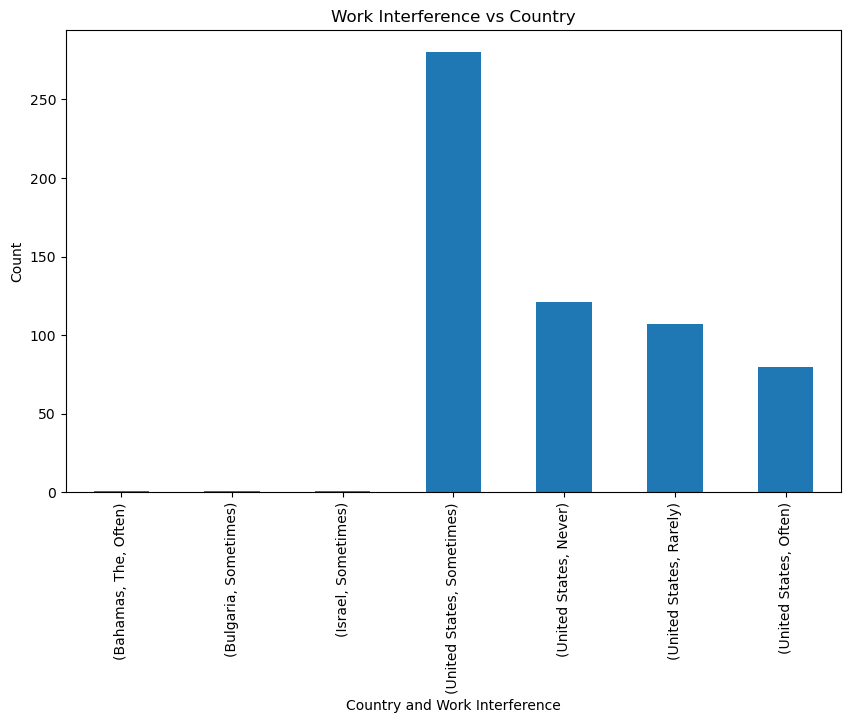

In [112]:
work_pie = data_df.groupby("Country")["work_interfere"].value_counts()
work_pie.plot(kind="bar", title="Work Interference vs Country", figsize=(10, 6))
plt.xlabel("Country and Work Interference")
plt.ylabel("Count")
plt.show()

#Determine higher or lower work interference within the countries.
#Constant low work interference for foreign countries but US has a pattern of a higher sometimes
#Possible outliers of foregin countries since there is a very low interference

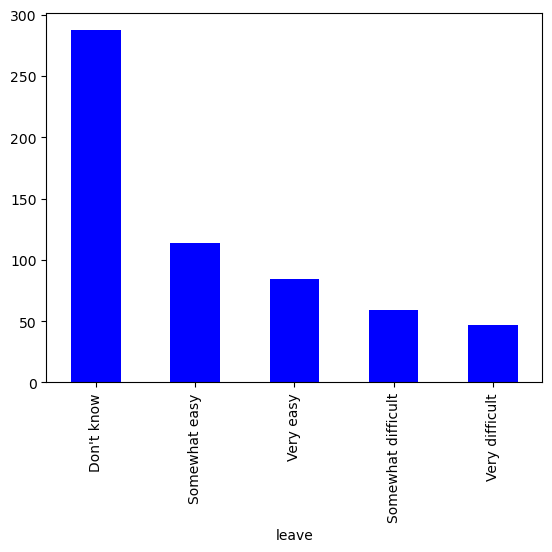

In [97]:
L_pie =data_df["leave"].value_counts()
Leave_pie = L_pie.plot(kind = "bar", color = "Blue")

#Most are unaware of the time off that is offered to them in order to get pontienal help. 
# It can be said many see leave as fincial burden and rather contiue becoming ill in order to make ends meet. 

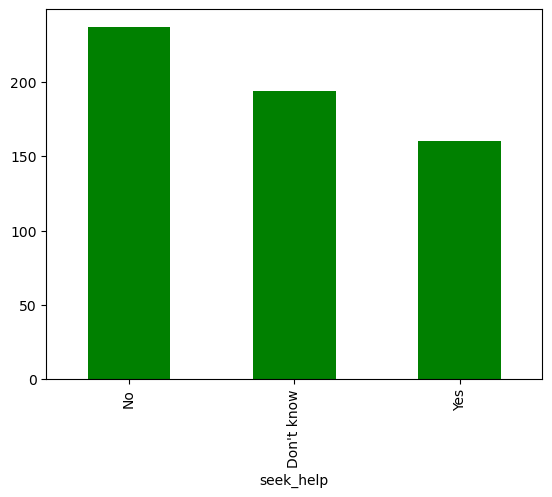

In [98]:
HelpSeeking_pie =data_df["seek_help"].value_counts()
Seeking_helpP = HelpSeeking_pie.plot(kind = "bar", color = "Green")

#Based on the data it can be said that that a majority do not seek help.
# Many can view mental illness as nonscense they need to deal with on there own or even keep sercert from others/professials 

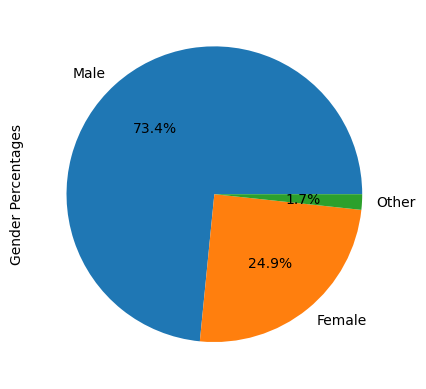

In [99]:
Gender_pie =data_df["Gender"].value_counts()
GenderP = Gender_pie.plot(kind = "pie", autopct="%1.1f%%", label = "Gender Percentages" ) 

# Most of the survery was taken by males who tend to be the gender that has been shaped by society to supress their feeling.
# Creating a bias survey since it tends be harder for express their feeling excpecially in a survey where it has the possibality to be exposed to the public 

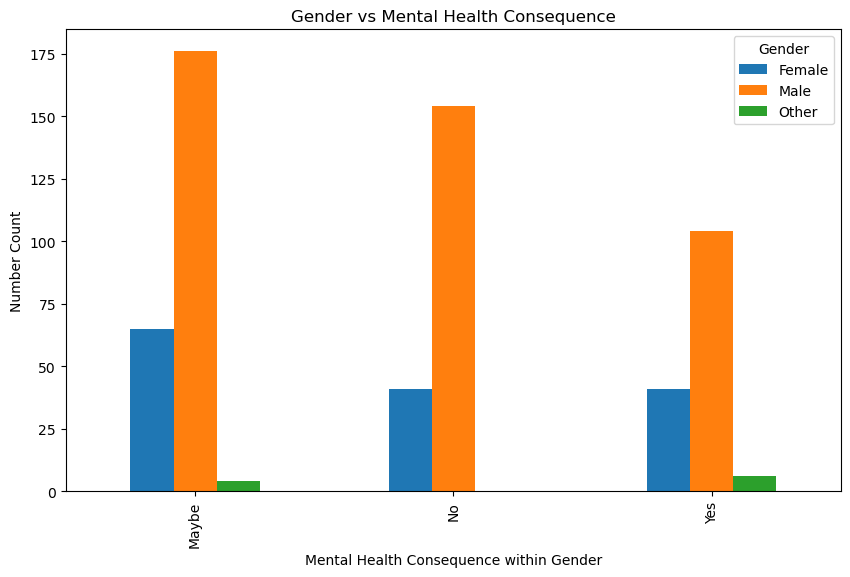

In [100]:
Mental_pie = data_df.groupby(["mental_health_consequence", "Gender"]).size().unstack()
Mental_pie.plot(kind="bar", title="Gender vs Mental Health Consequence", figsize=(10, 6))
plt.xlabel("Mental Health Consequence within Gender")
plt.ylabel("Number Count")
plt.show()

#Presents how eaxh gender is has suffered consequences but yet data goes back to the 
# pie plot where males being the majority of the survey count still are unsure if they are willing to be honest of the long term effects of mental health

In [101]:
data_df["mental_health_consequence"]

18         No
20      Maybe
21         No
22      Maybe
23      Maybe
        ...  
1252      Yes
1253    Maybe
1255       No
1256      Yes
1258    Maybe
Name: mental_health_consequence, Length: 591, dtype: object

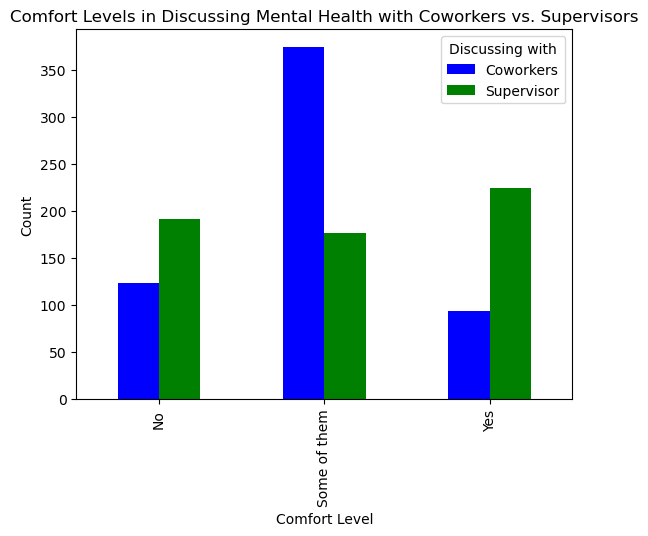

In [111]:
coworker_counts = data_df['coworkers'].value_counts()
supervisor_counts = data_df['supervisor'].value_counts()

#all in one data frame
confident_counts = pd.DataFrame({'Coworkers': coworker_counts, 'Supervisor': supervisor_counts})

# bar plot 
confident_counts.plot(kind='bar', color=['blue', 'green'])
plt.title("Comfort Levels in Discussing Mental Health with Coworkers vs. Supervisors")
plt.xlabel("Comfort Level")
plt.ylabel("Count")
plt.legend(title="Discussing with")

#any kind of professional setting can be daunting but most of the time indivuials grow to have have more trust within coworkers who are at the same work lvel as them
# Which then leads to having more trust with cowworkers than thoses at at higher postion than one 

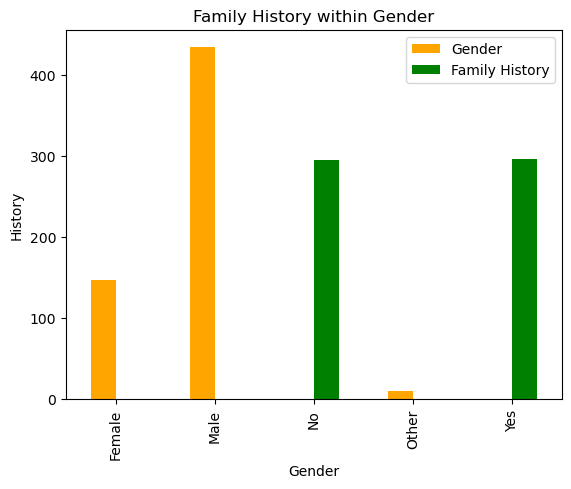

In [128]:
gender_count = data_df['Gender'].value_counts()
fam_counts = data_df['family_history'].value_counts()

#all in one data frame
combine_counts = pd.DataFrame({'Gender': gender_count, 'Family History': fam_counts}).fillna(0)

#bar
combine_counts.plot(kind='bar', color=['orange', 'green'])
plt.title("Family History within Gender")
plt.xlabel("Gender")
plt.ylabel("History")
plt.show()


#adjustment need for y-axis to show family history 
#then results will show how each specific gender may suffer with a past of history of illness which may be passed down or 
# been in an unhealthy enviornment at home where all household members are ill 

